<a href="https://colab.research.google.com/github/RitoshreeS/RitoshreeS/blob/main/Simple_Linear_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression with Synthetic Data**

Learning obectives:
1. Interpret diferent kinds of loss curves
2. Tune the following hyperparameters- Learning rate, No. of epochs, Batch size

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label)

In [ ]:
def build_model(my_learning_rate):
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # COnfigure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):

  # The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,y=label,batch_size=batch_size,epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


Here we are using Matplotlib to create the following two plots:

1. Plot of the feature values vs. the label values, and a line showing the output of the trained model.

2. Loss curve.

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):

  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Creating a line representing the model. The line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Defining the dataset

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Specify the hyperparameters

The hyperparameters are as follows:

1. Learning rate
2. Epoch
3.Batch size

The following code cell initializes these hyperparameters and then invokes the functions that build and train the mode

In [ ]:
#Case 1

learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should stay steady (zero slope or nearly zero slope), which indicates that training has converged..

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/300
1/1 [==============================] - 0s 262ms/step - loss: 160.3123 - root_mean_squared_error: 12.6614
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 141.1514 - root_mean_squared_error: 11.8807
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 128.4144 - root_mean_squared_error: 11.3320
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 118.4129 - root_mean_squared_error: 10.8818
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 110.0081 - root_mean_squared_error: 10.4885
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 102.6787 - root_mean_squared_error: 10.1330
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 96.1367 - root_mean_squared_error: 9.8049
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 90.2045 - root_mean_squared_error: 9.4976
Epoch 9/300
1/1 [==============================] - 0s 21ms/step - loss: 84.

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


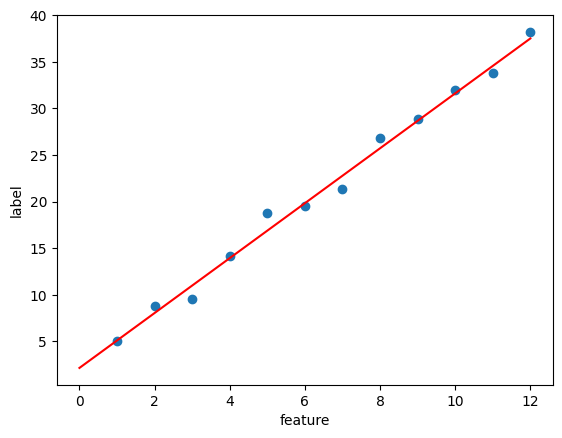

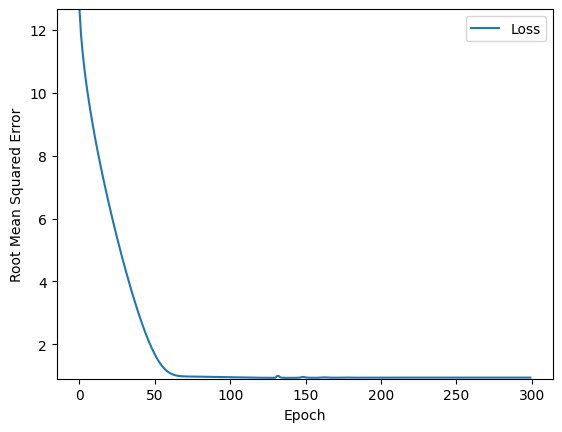

In [ ]:
#Case 2

learning_rate=0.03
epochs=300
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 403.0126 - root_mean_squared_error: 20.0752
Epoch 2/500
1/1 [==============================] - 0s 52ms/step - loss: 6712358.0000 - root_mean_squared_error: 2590.8218
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 400.1976 - root_mean_squared_error: 20.0049
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 2.4322 - root_mean_squared_error: 1.5596
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 0.9094 - root_mean_squared_error: 0.9536
Epoch 6/500
1/1 [==============================] - 0s 31ms/step - loss: 0.8872 - root_mean_squared_error: 0.9419
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 0.8858 - root_mean_squared_error: 0.9412
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8851 - root_mean_squared_error: 0.9408
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8844 - ro

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


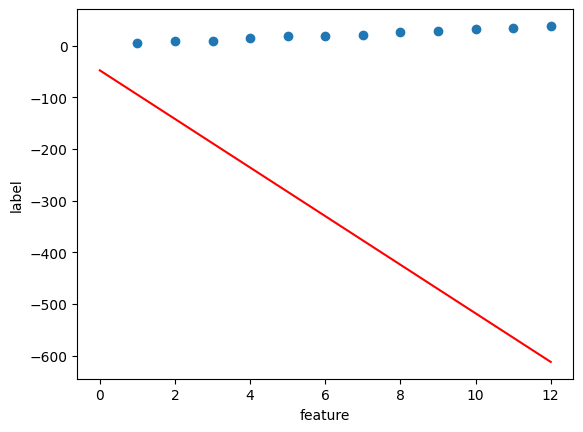

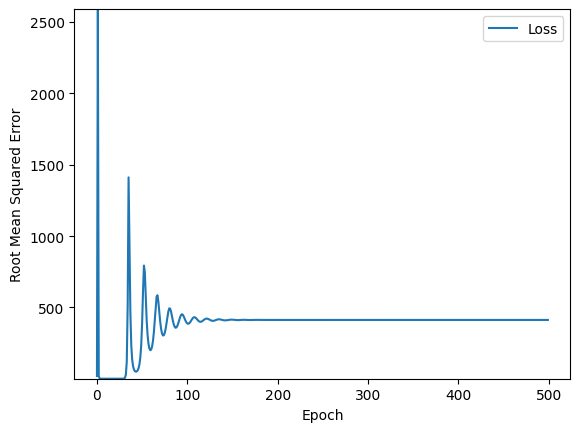

In [19]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible:

*  learning_rate
*  epochs

Epoch 1/70
1/1 [==============================] - 0s 278ms/step - loss: 342.4328 - root_mean_squared_error: 18.5049
Epoch 2/70
1/1 [==============================] - 0s 12ms/step - loss: 220.6871 - root_mean_squared_error: 14.8555
Epoch 3/70
1/1 [==============================] - 0s 15ms/step - loss: 156.2732 - root_mean_squared_error: 12.5009
Epoch 4/70
1/1 [==============================] - 0s 15ms/step - loss: 114.3051 - root_mean_squared_error: 10.6914
Epoch 5/70
1/1 [==============================] - 0s 15ms/step - loss: 84.7413 - root_mean_squared_error: 9.2055
Epoch 6/70
1/1 [==============================] - 0s 14ms/step - loss: 63.1142 - root_mean_squared_error: 7.9444
Epoch 7/70
1/1 [==============================] - 0s 12ms/step - loss: 46.9850 - root_mean_squared_error: 6.8546
Epoch 8/70
1/1 [==============================] - 0s 12ms/step - loss: 34.8486 - root_mean_squared_error: 5.9033
Epoch 9/70
1/1 [==============================] - 0s 12ms/step - loss: 25.6970 - root_m

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


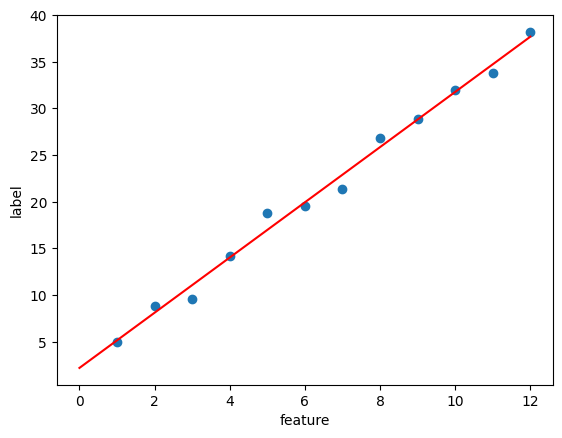

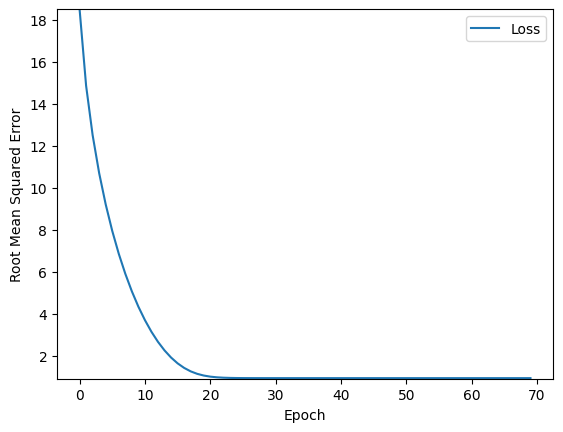

In [20]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.


Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 444.9149 - root_mean_squared_error: 21.0930
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 272.1684 - root_mean_squared_error: 16.4975
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 172.8757 - root_mean_squared_error: 13.1482
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 101.9784 - root_mean_squared_error: 10.0984
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 53.2742 - root_mean_squared_error: 7.2989
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 22.3957 - root_mean_squared_error: 4.7324
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 7.0003 - root_mean_squared_error: 2.6458
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 2.2295 - root_mean_squared_error: 1.4932
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


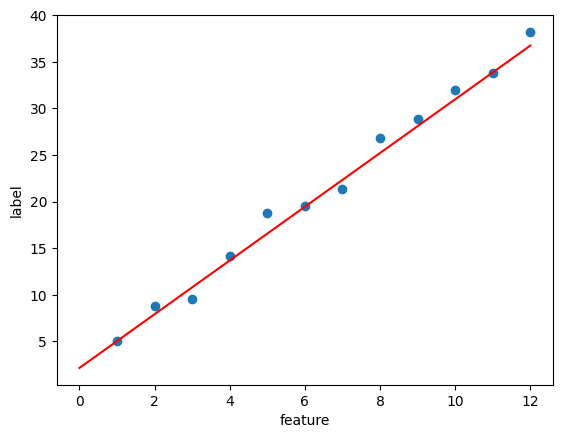

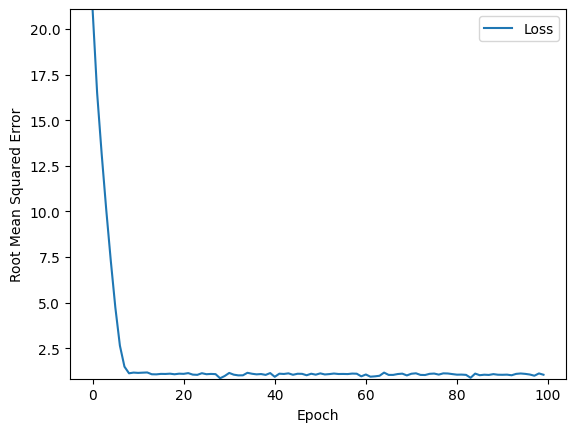

In [21]:
learning_rate=0.05
epochs=100
my_batch_size=1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

 The ideal combination of hyperparameters is data dependent, so you must always experiment and verify.